In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
plt.rc("font", size=14)

In [53]:
data=pd.read_csv(r'bank.csv',header=0)
data=data.dropna() #Удаление пропущенных данных
print(data.shape)
data.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [50]:
a=1000*(10-1) #N – номер студента по журналу ; chosen 10
data=data.iloc[a:a+10000,:]

In [51]:
data['education']=np.where(data['education'] =='basic.9y',
'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y',
'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y',
'Basic', data['education'])

In [54]:
from statistics import mean

# print(list(data.columns))
# data.groupby('y').mean()
# data.drop(data.columns[[0,11 и другие]], axis = 1, inplace = True) 

print(list(data.columns))
res = mean(data.y) 
print(res)

# columns_res = data.groupby('y').groups
# print(columns_res)

data.drop(data.columns[[2, 5, 7,13]], axis = 1, inplace = True) 
data.head()

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']
0.11265417111780131


,age,job,education,default,loan,month,day_of_week,duration,campaign,pdays,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,basic.4y,unknown,no,aug,thu,210,1,999,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,unknown,no,no,nov,fri,138,1,999,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,university.degree,no,no,jun,thu,339,3,6,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,high.school,no,no,apr,fri,185,2,999,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,basic.4y,no,no,aug,fri,137,1,3,success,-2.9,92.201,-31.4,0.869,5076.2,1


['age', 'job', 'education', 'default', 'loan', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


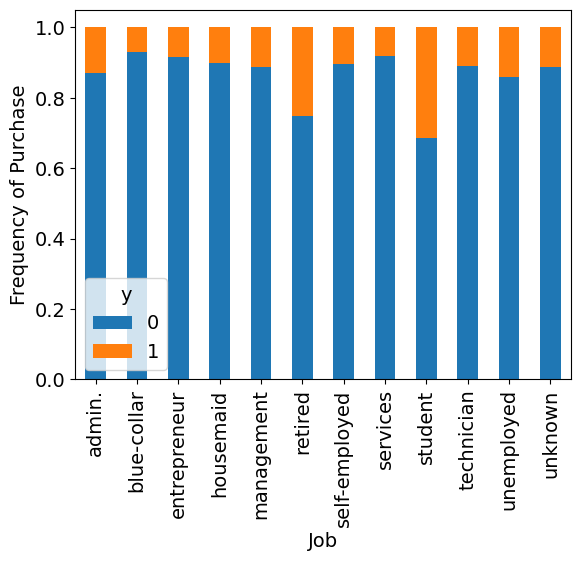

In [55]:
table=pd.crosstab(data.job,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
print(list(data.columns))
# data.drop(data.columns[[0,11 и другие]], axis = 1, inplace = True)